In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
df = pd.read_csv('T20_Player_Responses__Constrained_.csv')

In [3]:
df.head()

,Player_1,Player_2,Player_3,Player_4,Player_5,Player_6,Player_7,Player_8,Player_9,Player_10,Player_11
0,Bhanuka Rajapaksa,Sadeera Samarawickrama,Pathum Nissanka,Dunith Wellalage,Sahan Arachchige,Angelo Mathews,Kamindu Mendis,Dasun Shanaka,Maheesh Theekshana,Matheesha Pathirana,Binura Fernando
1,Kusal Mendis,Sadeera Samarawickrama,Kusal Perera,Bhanuka Rajapaksa,Dunith Wellalage,Sahan Arachchige,Kamindu Mendis,Wanindu Hasaranga,Matheesha Pathirana,Dushmantha Chameera,Binura Fernando
2,Dhananjaya Lakshan,Pathum Nissanka,Kusal Perera,Sadeera Samarawickrama,Chamika Karunaratne,Sahan Arachchige,Dunith Wellalage,Wanindu Hasaranga,Maheesh Theekshana,Nuwan Thushara,Matheesha Pathirana
3,Lasith Croospulle,Kusal Mendis,Bhanuka Rajapaksa,Dunith Wellalage,Wanindu Hasaranga,Dasun Shanaka,Lahiru Madushanka,Chamika Karunaratne,Lakshan Sandakan,Maheesh Theekshana,Matheesha Pathirana
4,Kusal Mendis,Kusal Perera,Minod Bhanuka,Kamindu Mendis,Angelo Mathews,Dunith Wellalage,Dasun Shanaka,Nuwan Thushara,Dilshan Madushanka,Akila Dananjaya,Matheesha Pathirana


In [4]:
df.describe()

,Player_1,Player_2,Player_3,Player_4,Player_5,Player_6,Player_7,Player_8,Player_9,Player_10,Player_11
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,18,18,18,28,10,10,24,25,25,15,15
top,Kusal Mendis,Kusal Perera,Pathum Nissanka,Dunith Wellalage,Dasun Shanaka,Wanindu Hasaranga,Kamindu Mendis,Maheesh Theekshana,Binura Fernando,Nuwan Thushara,Matheesha Pathirana
freq,169,156,141,115,221,207,178,110,162,191,172


# Top five Players in Each Category 

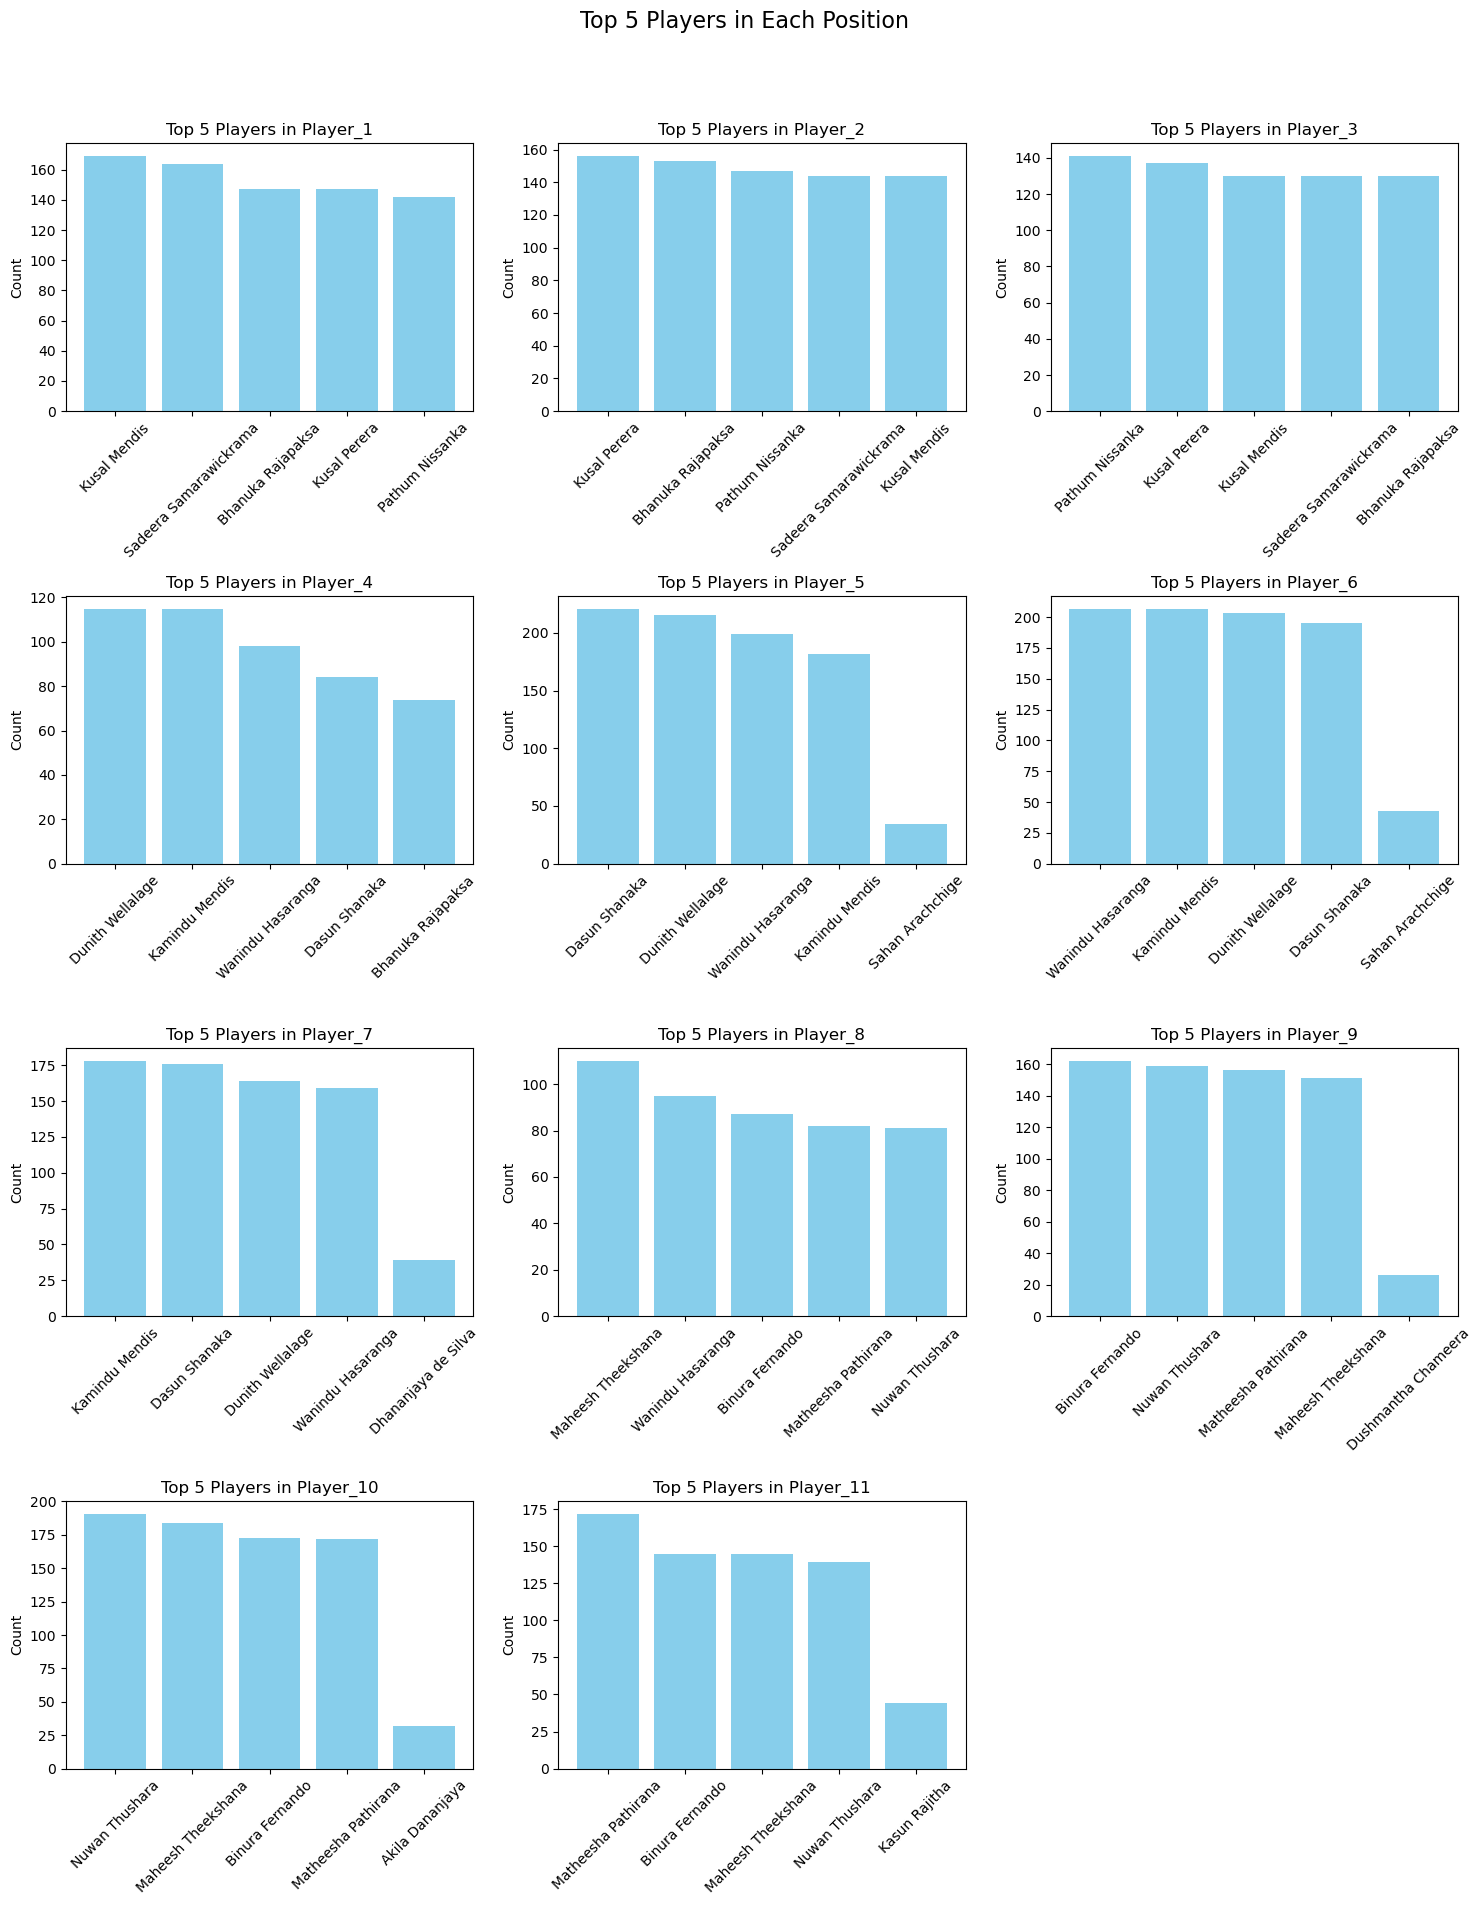

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Top 5 Players in Each Position', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(df.columns):
    
    player_counts = df[column].value_counts() 
    top_players = player_counts.nlargest(5)
    
    axes[i].bar(top_players.index, top_players.values, color='skyblue')
    axes[i].set_title(f'Top 5 Players in {column}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

# finding the best Player for each Category 

In [15]:
import pandas as pd

# Initialize the DataFrame
top_players = pd.DataFrame(columns=['Position', 'Player', 'Frequency'])

for column in df.columns:
    player_counts = df[column].value_counts()
    
    top_player = player_counts.idxmax()
    top_frequency = player_counts.max()
    
    # Use pd.concat instead of append
    top_players = pd.concat([top_players, pd.DataFrame([{'Position': column, 'Player': top_player, 'Frequency': top_frequency}])], ignore_index=True)

# Print the table using tabulate if installed
try:
    from tabulate import tabulate
    print(tabulate(top_players, headers='keys', tablefmt='pretty'))
except ImportError:
    print("Tabulate is not installed. Use 'pip install tabulate' to install it.")
    print(top_players)


+----+-----------+---------------------+-----------+
|    | Position  |       Player        | Frequency |
+----+-----------+---------------------+-----------+
| 0  | Player_1  |    Kusal Mendis     |    169    |
| 1  | Player_2  |    Kusal Perera     |    156    |
| 2  | Player_3  |   Pathum Nissanka   |    141    |
| 3  | Player_4  |  Dunith Wellalage   |    115    |
| 4  | Player_5  |    Dasun Shanaka    |    221    |
| 5  | Player_6  |  Wanindu Hasaranga  |    207    |
| 6  | Player_7  |   Kamindu Mendis    |    178    |
| 7  | Player_8  | Maheesh Theekshana  |    110    |
| 8  | Player_9  |   Binura Fernando   |    162    |
| 9  | Player_10 |   Nuwan Thushara    |    191    |
| 10 | Player_11 | Matheesha Pathirana |    172    |
+----+-----------+---------------------+-----------+


# finding All Unique Players

In [17]:

unique_values_dict = {}
all_unique_values = set() 

for column in df.columns:
    
    unique_values = df[column].unique()

    unique_values_dict[column] = unique_values.tolist()
    all_unique_values.update(unique_values)

all_unique_values_list = list(all_unique_values)

unique_values_set = set(all_unique_values_list)

# Convert back to a list
unique_values_list = list(unique_values_set)


unique_values_list.sort()
print("\nSorted unique values:")
print(unique_values_list)



Sorted unique values:
['Akila Dananjaya', 'Angelo Mathews', 'Ashen Bandara', 'Asitha Fernando', 'Avishka Fernando', 'Bhanuka Rajapaksa', 'Binura Fernando', 'Chamika Karunaratne', 'Charith Asalanka', 'Dasun Shanaka', 'Dhananjaya Lakshan', 'Dhananjaya de Silva', 'Dilshan Madushanka', 'Dilshan Munaweera', 'Dinesh Chandimal', 'Dunith Wellalage', 'Dushmantha Chameera', 'Duvindu Tillakaratne', 'Janith Liyanage', 'Jeffrey Vandersay', 'Kamindu Mendis', 'Kasun Rajitha', 'Kusal Mendis', 'Kusal Perera', 'Lahiru Kumara', 'Lahiru Madushanka', 'Lahiru Udara', 'Lakshan Sandakan', 'Lasith Croospulle', 'Maheesh Theekshana', 'Matheesha Pathirana', 'Minod Bhanuka', 'Nishan Madushka', 'Nuwan Thushara', 'Nuwanidu Fernando', 'Oshada Fernando', 'Pathum Nissanka', 'Pramod Madushan', 'Ramesh Mendis', 'Sadeera Samarawickrama', 'Sahan Arachchige', 'Vijayakanth Viyaskanth', 'Wanindu Hasaranga']


# Encoding

In [19]:
encoding_map = {
    'Akila Dananjaya': 0, 'Angelo Mathews': 1, 'Ashen Bandara': 2, 'Asitha Fernando': 3,
    'Avishka Fernando': 4, 'Bhanuka Rajapaksa': 5, 'Binura Fernando': 6, 'Chamika Karunaratne': 7,
    'Charith Asalanka': 8, 'Dasun Shanaka': 9, 'Dhananjaya Lakshan': 10, 'Dhananjaya de Silva': 11,
    'Dilshan Madushanka': 12, 'Dilshan Munaweera': 13, 'Dinesh Chandimal': 14, 'Dunith Wellalage': 15,
    'Dushmantha Chameera': 16, 'Duvindu Tillakaratne': 17, 'Janith Liyanage': 18, 'Jeffrey Vandersay': 19,
    'Kamindu Mendis': 20, 'Kasun Rajitha': 21, 'Kusal Mendis': 22, 'Kusal Perera': 23,
    'Lahiru Kumara': 24, 'Lahiru Madushanka': 25, 'Lahiru Udara': 26, 'Lakshan Sandakan': 27,
    'Lasith Croospulle': 28, 'Maheesh Theekshana': 29, 'Matheesha Pathirana': 30, 'Minod Bhanuka': 31,
    'Nishan Madushka': 32, 'Nuwan Thushara': 33, 'Nuwanidu Fernando': 34, 'Oshada Fernando': 35,
    'Pathum Nissanka': 36, 'Pramod Madushan': 37, 'Ramesh Mendis': 38, 'Sadeera Samarawickrama': 39,
    'Sahan Arachchige': 40, 'Vijayakanth Viyaskanth': 41, 'Wanindu Hasaranga': 42
}

# Apply the encoding map to each column
for column in df.columns:
    df[column] = df[column].map(encoding_map)

# Now the DataFrame `df` has all player names converted to numbers
print("Encoded DataFrame:")
print(df)

Encoded DataFrame:
     Player_1  Player_2  Player_3  Player_4  Player_5  Player_6  Player_7  \
0           5        39        36        15        40         1        20   
1          22        39        23         5        15        40        20   
2          10        36        23        39         7        40        15   
3          28        22         5        15        42         9        25   
4          22        23        31        20         1        15         9   
..        ...       ...       ...       ...       ...       ...       ...   
995        39        36        18        22        20        42         9   
996        39         5        23        42         9        25        33   
997        35        39        32        15         1        20         9   
998        22        23        39         5         9        42        38   
999         2        22        23         7        42        20         1   

     Player_8  Player_9  Player_10  Player_11  
0       

# calculate favoritism score

In [21]:
player_counts = df.stack().value_counts()
player_scores = {player: count for player, count in player_counts.items()}
print(player_scores)

{15: 795, 42: 776, 20: 775, 9: 756, 29: 611, 33: 605, 30: 604, 6: 594, 22: 514, 5: 504, 39: 501, 36: 500, 23: 495, 40: 180, 11: 160, 38: 153, 7: 152, 25: 151, 1: 147, 16: 110, 12: 110, 3: 105, 0: 105, 21: 98, 37: 96, 19: 93, 17: 92, 27: 86, 2: 84, 28: 83, 4: 83, 41: 82, 35: 78, 10: 78, 32: 77, 13: 76, 31: 76, 24: 74, 18: 74, 8: 68, 26: 68, 34: 67, 14: 64}


In [23]:
def calculate_favoritism_score(row):
    score = 0
    for player in row:
        score += player_scores.get(player, 0)
    return score

In [25]:
df['favoritism_score'] = df.apply(calculate_favoritism_score, axis=1)

In [27]:
df.head()

,Player_1,Player_2,Player_3,Player_4,Player_5,Player_6,Player_7,Player_8,Player_9,Player_10,Player_11,favoritism_score
0,5,39,36,15,40,1,20,9,29,30,6,5967
1,22,39,23,5,15,40,20,42,30,16,6,5848
2,10,36,23,39,7,40,15,42,29,33,30,5297
3,28,22,5,15,42,9,25,7,27,29,30,5032
4,22,23,31,20,1,15,9,33,12,0,30,4982


In [29]:
df['favoritism_score'].max()

7035

In [31]:
X = df.drop(columns=['favoritism_score'])  # Encoded player data
y = df['favoritism_score']  # Favoritism scores as target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Training 

In [36]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}


threshold = 0.1


results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5  
    r2 = r2_score(y_test, predictions)
    
    
    relative_error = np.abs((predictions - y_test) / y_test)
    accuracy = np.mean(relative_error < threshold) * 100  # Percentage accuracy
    
    
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2,
        'Accuracy': accuracy
    }


for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")


Model: Random Forest
MAE: 472.2437
MSE: 362600.2010
RMSE: 602.1629
R² Score: 0.2609
Accuracy: 67.0000

Model: Linear Regression
MAE: 537.2820
MSE: 480554.6042
RMSE: 693.2205
R² Score: 0.0205
Accuracy: 58.0000

Model: XGBoost
MAE: 412.7321
MSE: 269124.2001
RMSE: 518.7718
R² Score: 0.4515
Accuracy: 70.5000

Model: Decision Tree
MAE: 708.7100
MSE: 814688.7400
RMSE: 902.6011
R² Score: -0.6605
Accuracy: 48.5000


In [38]:
xgboost_model = models['XGBoost']


with open('model_XGBoost.pkl', 'wb') as file:
    pickle.dump(xgboost_model, file)

print("XGBoost model saved as 'model_XGBoost.pkl'.")

XGBoost model saved as 'model_XGBoost.pkl'.
